In [66]:
"""
Q1. Take this dataset for bank customer churn prediction:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
1) Build a deep learning model to predict the churn rate at the bank.
2) Once the model is built, print a classification report and analyze precision, recall and
f1-score

Q2. Use Keras mnist dataset from
https://keras.io/api/datasets/fashion_mnist/
Build a neural network. Figure out,
1. Optimal number of hidden layers and neurons in each hidden layer that can give you the
best accuracy
2. Optional accuracy score
"""

#import keras
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras import Sequential, models,layers

In [3]:
df_bank=pd.read_csv("/Churn_Modelling.csv")

In [4]:
df_bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df_bank['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [13]:
#df_bank.drop(labels=("Surname","RowNumber","Surname"),inplace=True)
df_bank.drop(' Surname',axis='columns',inplace=True)
df_bank.drop('RowNumber',axis='columns',inplace=True)
df_bank.drop('CustomerId',axis='columns',inplace=True)

In [14]:
df_bank


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [16]:

pd.to_numeric(df_bank.Balance)
pd.to_numeric(df_bank.EstimatedSalary)


0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [20]:
df_bank.Balance.dtype

dtype('float64')

In [21]:
df_bank.EstimatedSalary.dtype

dtype('float64')

In [22]:
"""
df1[df1.Churn=='No'].shape

(5163, 20)

tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


"""

'\ndf1[df1.Churn==\'No\'].shape\n\n(5163, 20)\n\ntenure_churn_no = df1[df1.Churn==\'No\'].tenure\ntenure_churn_yes = df1[df1.Churn==\'Yes\'].tenure\n\nplt.xlabel("tenure")\nplt.ylabel("Number Of Customers")\nplt.title("Customer Churn Prediction Visualiztion")\n\nplt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=[\'green\',\'red\'],label=[\'Churn=Yes\',\'Churn=No\'])\nplt.legend()\n\n\n'

In [25]:
tenure_churn_no = df_bank[df_bank.Exited==0].Tenure
tenure_churn_yes = df_bank[df_bank.Exited==1].Tenure


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


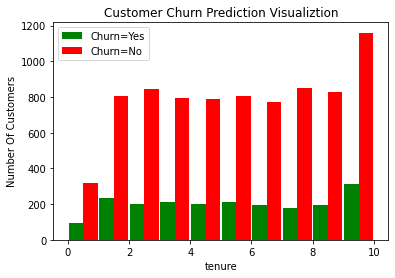

In [28]:
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


In [29]:


def print_unique_col_values(df):
  for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df_bank)



Geography: ['France' 'Spain' 'Germany']


In [32]:
df_bank.drop("Geography",axis= 1,inplace=True)

In [33]:
df_bank

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1


In [34]:
"""


cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

"""

"\n\n\ncols_to_scale = ['tenure','MonthlyCharges','TotalCharges']\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ndf2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])\n\n"

In [36]:
cols_to_scale = ['CreditScore','Balance',"Age","NumOfProducts","EstimatedSalary"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_bank[cols_to_scale] = scaler.fit_transform(df_bank[cols_to_scale])

In [37]:
df_bank

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,0.229730,10,0.228657,0.000000,1,1,0.508490,0
9997,0.718,1,0.243243,7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,0,0.324324,3,0.299226,0.333333,1,0,0.464429,1


In [42]:


X = df_bank.drop('Exited',axis='columns')
y = df_bank['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
len(X_train.columns)


9

In [43]:

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(9,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
250/250 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.7959
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.7990
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4537 - accuracy: 0.8034
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.8089
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.8100
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8105
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8075
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.8120
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4318 - accura

In [49]:
y_predicted=model.predict(X_test)
y_predicted_label=[np.argmax(i) for i in y_predicted]
print(classification_report(y_test,y_predicted_label))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:


"""
Q2. Use Keras mnist dataset from
https://keras.io/api/datasets/fashion_mnist/
Build a neural network. Figure out,
1. Optimal number of hidden layers and neurons in each hidden layer that can give you the
best accuracy
2. Optional accuracy score
"""

'\nQ2. Use Keras mnist dataset from\nhttps://keras.io/api/datasets/fashion_mnist/\nBuild a neural network. Figure out,\n1. Optimal number of hidden layers and neurons in each hidden layer that can give you the\nbest accuracy\n2. Optional accuracy score\n'

In [54]:
(X_train, X_test),(  y_train, y_test) = keras.datasets.fashion_mnist.load_data()#train_test_split(X,y,test_size=0.2,random_state=5)
#len(X_train.columns)

In [55]:
"""
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
"""

'\ndef plot_sample(X, y, index):\n    plt.figure(figsize = (15,2))\n    plt.imshow(X[index])\n    plt.xlabel(classes[y[index]])\n'

In [62]:
X_train=X_train/255
X_test=X_test/255
X_train.shape


(60000, 28, 28)

In [71]:
"""model_cnn=keras.models.Sequential((
    layers.Conv2D(filters=20,kernel_size=(2,2),activation="relu",input_shape=(28,28)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=20,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(20,activation="relu"),
    layers.Dense(10,activation="softmax")

))
#X_train.shape"""

'model_cnn=keras.models.Sequential((\n    layers.Conv2D(filters=20,kernel_size=(2,2),activation="relu",input_shape=(28,28)),\n    layers.MaxPooling2D((2,2)),\n\n    layers.Conv2D(filters=20,kernel_size=(3,3),activation="relu"),\n    layers.MaxPooling2D((2,2)),\n\n    layers.Flatten(),\n    layers.Dense(20,activation="relu"),\n    layers.Dense(10,activation="softmax")\n\n))\n#X_train.shape'

In [ ]:
keras

